In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
training_epochs = 10
batch_size = 226
display_step = 1
examples_to_show = 10
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

In [5]:
X = tf.placeholder('float', [None, n_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input]))
}
encoder_in = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['encoder_h1']), biases['encoder_b1']))
encoder_out = tf.nn.sigmoid(tf.add(tf.matmul(encoder_in, weights['encoder_h2']), biases['encoder_b2']))
decoder_in = tf.nn.sigmoid(tf.add(tf.matmul(encoder_out, weights['decoder_h1']), biases['decoder_b1']))
decoder_out = tf.nn.sigmoid(tf.add(tf.matmul(decoder_in, weights['decoder_h2']), biases['decoder_b2']))

In [7]:
y_pred = decoder_out
y_true = X
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 0.195462331
Epoch: 0002 cost= 0.155025423
Epoch: 0003 cost= 0.137538314
Epoch: 0004 cost= 0.133477733
Epoch: 0005 cost= 0.126260877
Epoch: 0006 cost= 0.122764856
Epoch: 0007 cost= 0.118986718
Epoch: 0008 cost= 0.116816804
Epoch: 0009 cost= 0.114023231
Epoch: 0010 cost= 0.111829989
Optimization Finished!


IndexError: index 4 is out of bounds for axis 0 with size 4

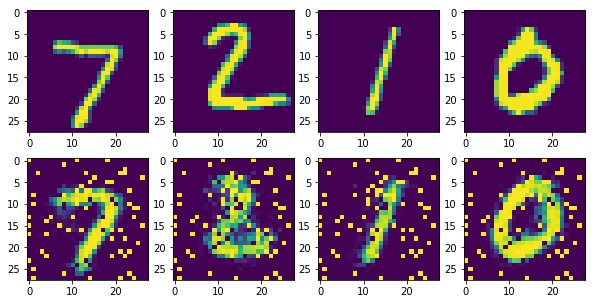

In [9]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        if epoch % display_step == 0:
            print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(c))
    print('Optimization Finished!')
    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    
    f, a = plt.subplots(2,4,figsize=(10,5))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()